<h1 style="text-align: center">Perceptron Learning Algorithm</h1>

In [2]:
import numpy as np

In [3]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [4]:
y = np.array(X[:, 0] | X[:, 1])

In [5]:
y

array([0, 1, 1, 1])

In [90]:
class PLA:
    def __init__(self, learning_rate = 0.01, max_iterations = 1000, activation = "sigmoid"):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        
        if activation == "relu":
            self.activation = self._relu
            self.grad_act = self.grad_relu
        else:
            self.activation = self._sigmoid
            self.grad_act = self.grad_sigmoid
        self.weight = None
        self.bias = None
    
    def _relu(self, z):
        return max(0, z)

    def grad_relu(self, z):
        return 1 if z > 0 else 0
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def grad_sigmoid(self, z):
        return self._sigmoid(z) - 1
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weight = np.random.rand(n_features)
        self.bias = np.random.rand(1)
        
        for i in range(self.max_iterations):
            # SGD
            for idx, data in enumerate(X):
                z = self.weight.T @ data + self.bias
                z = self.activation(z)
                loss = (y[idx] - z) / (z - z**2)
                self.weight -= self.lr * loss * self.grad_act(z) * data
                self.bias -= self.lr * loss * self.grad_act(z)
                
    def predict(self, X):
        X = np.reshape(X, (-1, X.shape[1]))
        return self.weight @ X.T + self.bias
                

In [97]:
pla = PLA( activation = "sigmoid")

In [98]:
pla.fit(X, y)

In [99]:
import matplotlib.pyplot as plt

In [100]:
X_min, X_max = -2, 2
y_min, y_max = -2, 2

xx, yy = np.meshgrid(np.arange(X_min, X_max, .01), np.arange(y_min, y_max, .01))
z = pla.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

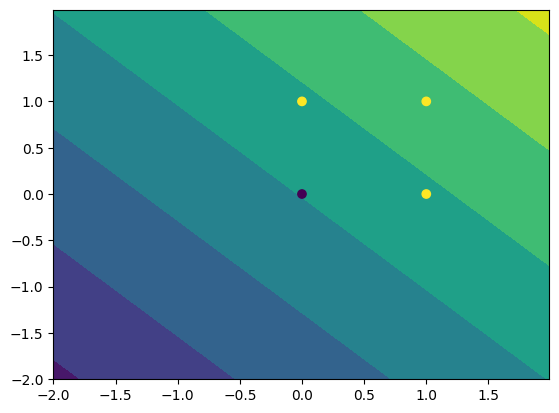

In [101]:
plt.contourf(xx, yy, z)
plt.scatter(X[:, 0], X[:, 1], c = y)

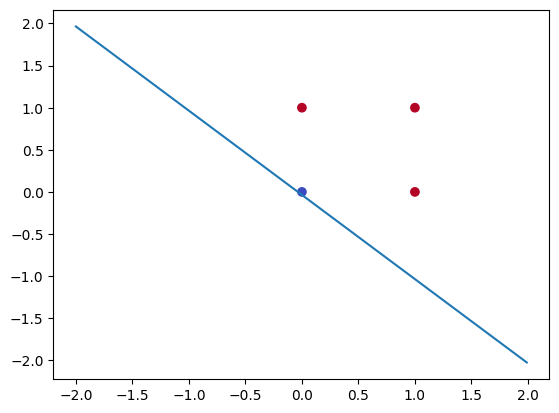

In [102]:
xx_1 = np.arange(X_min, X_max, .01)
z = - (pla.bias + pla.weight[-1] * xx_1) / pla.weight[1]

plt.plot(xx_1, z)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")